In [3]:
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}


SyntaxError: invalid syntax (<ipython-input-3-6a0b4f104c53>, line 1)

In [4]:
import pandas as pd 
wdbc_data = pd.read_csv('breast-cancer-wisconsin_wdbc.csv',sep=',')
wdbc_data.head()

,%id,diagnosis (M=malignant; B=benign),radius (nucA),texture (nucA),perimeter (nucA),area (nucA),smoothness (nucA),compactness (nucA),concavity (nucA),concave points (nucA),...,radius (nucC),texture (nucC),perimeter (nucC),area (nucC),smoothness (nucC),compactness (nucC),concavity (nucC),concave points (nucC),symmetry (nucC),fractal dimension (nucC)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
wdbc_data.columns

Index(['%id', 'diagnosis (M=malignant; B=benign)', 'radius (nucA)',
       'texture (nucA)', 'perimeter (nucA)', 'area (nucA)',
       'smoothness (nucA)', 'compactness (nucA)', 'concavity (nucA)',
       'concave points (nucA)', 'symmetry (nucA)', 'fractal dimension (nucA)',
       'radius (nucB)', 'texture (nucB)', 'perimeter (nucB)', 'area (nucB)',
       'smoothness (nucB)', 'compactness (nucB)', 'concavity (nucB)',
       'concave points (nucB)', 'symmetry (nucB)', 'fractal dimension (nucB)',
       'radius (nucC)', 'texture (nucC)', 'perimeter (nucC)', 'area (nucC)',
       'smoothness (nucC)', 'compactness (nucC)', 'concavity (nucC)',
       'concave points (nucC)', 'symmetry (nucC)', 'fractal dimension (nucC)'],
      dtype='object')

In [6]:
wdbc_data['diagnosis (M=malignant; B=benign)'].value_counts()

B    357
M    212
Name: diagnosis (M=malignant; B=benign), dtype: int64

In [7]:
wdbc_data['diagnosis (M=malignant; B=benign)']=wdbc_data['diagnosis (M=malignant; B=benign)'].replace('M',1 )
wdbc_data['diagnosis (M=malignant; B=benign)']=wdbc_data['diagnosis (M=malignant; B=benign)'].replace('B', 0)
y = wdbc_data['diagnosis (M=malignant; B=benign)']
X = wdbc_data.iloc[0:, 2:32]


In [8]:
from sklearn.model_selection import train_test_split

y_train,y_test,X_train,X_test = train_test_split(y,X,test_size = .2)

In [9]:
from sklearn.linear_model import LogisticRegression
logist_model=LogisticRegression()
logist_model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logist_model.coef_


array([[-2.02202989e+00, -1.20036589e-01, -8.54285263e-02,
         6.88472358e-03,  1.31419495e-01,  3.72949215e-01,
         6.42409412e-01,  3.35381593e-01,  1.68456702e-01,
         2.48284221e-02, -5.23359335e-03, -5.14614513e-01,
        -1.27510894e-01,  7.75215717e-02,  2.21963225e-02,
         1.65593640e-02,  8.57152551e-02,  4.48810053e-02,
         4.94572602e-02, -1.10297735e-03, -1.08537797e+00,
         2.94401269e-01,  2.09496817e-01,  2.45022892e-02,
         2.45635570e-01,  8.71955467e-01,  1.42093292e+00,
         5.93979757e-01,  4.81711716e-01,  9.17283027e-02]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1e2e6b00>)

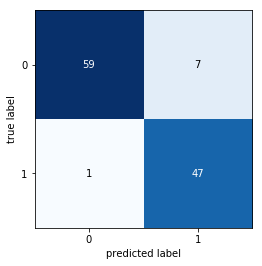

In [11]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
y_pred=logist_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))


Accuracy: 0.9298245614035088
Precision: 0.8703703703703703
